## **<span style="color:#023e8a;">Intro</span>**

**<span style="color:#023e8a;">The competition is dedicated to the product recomendations (H&M)  </span>**

**<span style="color:#023e8a;">Here we have different kinds of data that help us to get good recomendations: </span>**

📸 `images` - images of every article_id

🙋 `articles`  - detailed metadata of every article_id

👔 `customers`  - detailed metadata of every customer_id

🧾 `transactions_train`  - purchases with details

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [5]:
articles = pd.read_csv("../data/articles.csv")
customers = pd.read_csv("../data/customers.csv")
transactions = pd.read_csv("../data/transactions_train.csv")

## **<span id="Articles" style="color:#023e8a;">Articles</span>**
**<span style="color:#023e8a;"> This table contains all h&m articles with details such as a type of product, a color, a product group and other features.</span>**  
**<span style="color:#023e8a;"> Article data description: </span>**

> `article_id` **<span style="color:#023e8a;">: A unique identifier of every article.</span>**  
> `product_code`, `prod_name` **<span style="color:#023e8a;">: A unique identifier of every product and its name (not the same).</span>**  
> `product_type`, `product_type_name` **<span style="color:#023e8a;">: The group of product_code Qand its name</span>**  
> `graphical_appearance_no`, `graphical_appearance_name` **<span style="color:#023e8a;">: The group of graphics and its name</span>**  
> `colour_group_code`, `colour_group_name` **<span style="color:#023e8a;">: The group of color and its name</span>**  
> `perceived_colour_value_id`, `perceived_colour_value_name`, `perceived_colour_master_id`, `perceived_colour_master_name` **<span style="color:#023e8a;">: The added color info</span>**  
> `department_no`, `department_name`: **<span style="color:#023e8a;">: A unique identifier of every dep and its name</span>**  
> `index_code`, `index_name`: **<span style="color:#023e8a;">: A unique identifier of every index and its name</span>**  
> `index_group_no`, `index_group_name`: **<span style="color:#023e8a;">: A group of indeces and its name</span>**  
> `section_no`, `section_name`: **<span style="color:#023e8a;">: A unique identifier of every section and its name</span>**  
> `garment_group_no`, `garment_group_name`: **<span style="color:#023e8a;">: A unique identifier of every garment and its name</span>**  
> `detail_desc`: **<span style="color:#023e8a;">: Details</span>**  

In [7]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [6]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [12]:
articles.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


In [14]:
#describe the articles categorical columns
articles.describe(include='object')


,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_code,index_name,index_group_name,section_name,garment_group_name,detail_desc
count,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,105126
unique,45875,131,19,30,50,8,20,250,10,10,5,56,21,43404
top,Dragonfly dress,Trousers,Garment Upper body,Solid,Black,Dark,Black,Jersey,A,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,T-shirt in printed cotton jersey.
freq,98,11169,42741,49747,22670,42706,22585,4604,26001,26001,39737,7295,21445,159


**<span style="color:#023e8a;">Now, pay attention to index group-index structure. Ladieswear and Children/Baby have subgroups.</span>**

In [15]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

**<span style="color:#023e8a;"> And look at the product group-product structure. Accessories are really various, the most numerious: bags, earrings and hats. However, trousers prevail.</span>**

In [16]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [17]:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        print(f'n of unique {col}: {un_n}')

n of unique prod_name: 45875
n of unique product_type_name: 131
n of unique product_group_name: 19
n of unique graphical_appearance_name: 30
n of unique colour_group_name: 50
n of unique perceived_colour_value_name: 8
n of unique perceived_colour_master_name: 20
n of unique department_name: 250
n of unique index_name: 10
n of unique index_group_name: 5
n of unique section_name: 56
n of unique garment_group_name: 21
n of unique detail_desc: 43404


# **<span style="color:#023e8a;">Ladieswear accounts for a significant part of all dresses. Sportswear has the least portion.</span>**

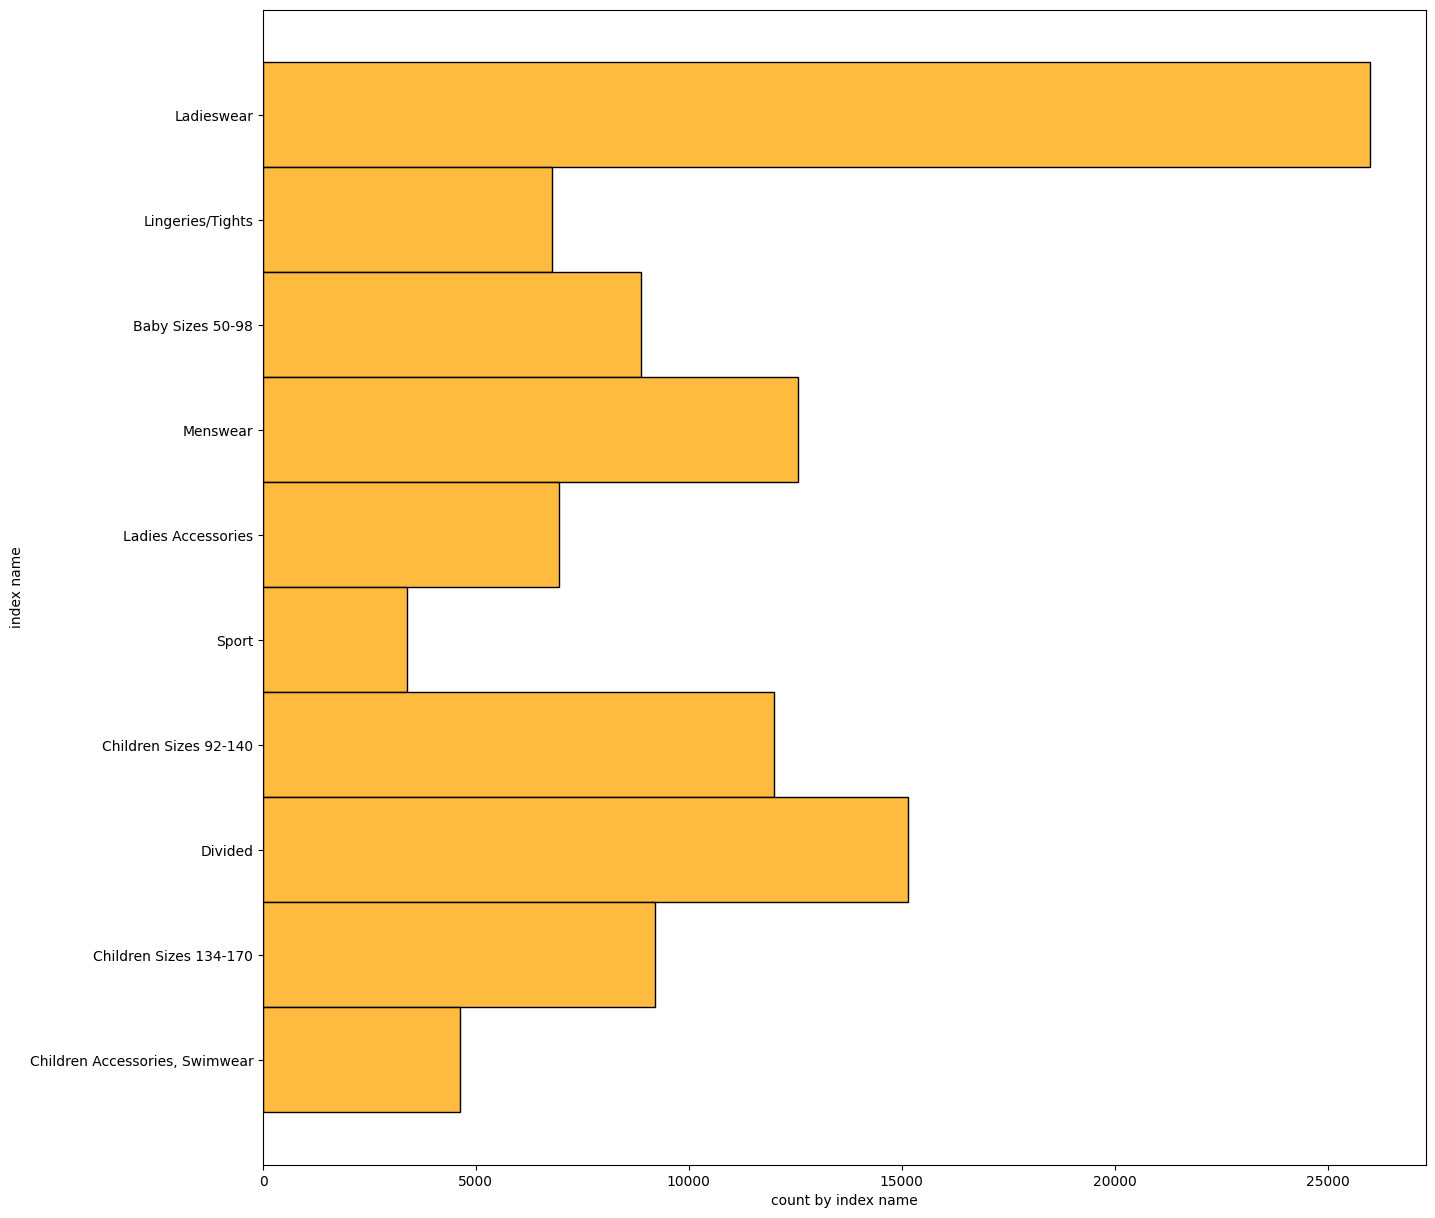

In [10]:
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.histplot(data=articles, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

**<span style="color:#023e8a;"> The garments grouped by index: Jersey fancy is the most frequent garment, especially for women and children. The next by number is accessories, many various accessories with low price.</span>**

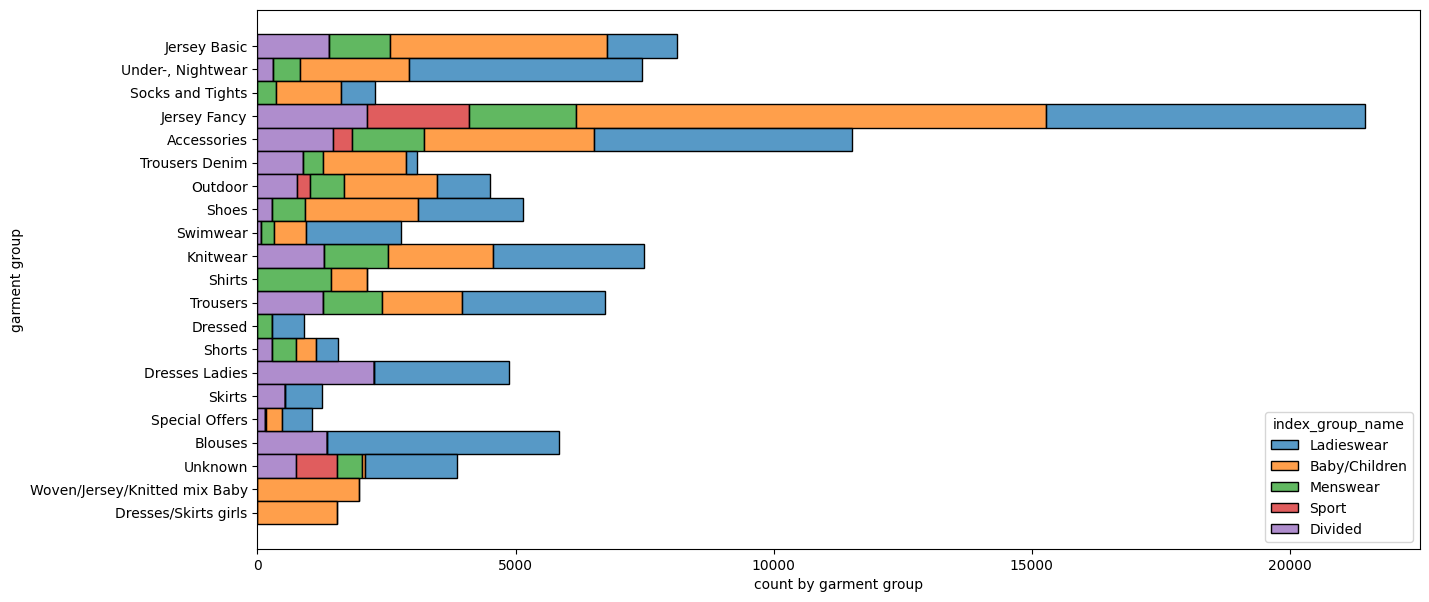

In [11]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

# ## **<span id="Customers" style="color:#023e8a;">Customers</span>**

**<span style="color:#023e8a;"> Customers data description: </span>**

> `customer_id` **<span style="color:#023e8a;">: A unique identifier of every customer</span>**  
> `FN` **<span style="color:#023e8a;">: 1 or missed </span>**  
> `Active` **<span style="color:#023e8a;">: 1 or missed</span>**  
> `club_member_status` **<span style="color:#023e8a;">: Status in club</span>**  
> `fashion_news_frequency` **<span style="color:#023e8a;">: How often H&M may send news to customer</span>**  
> `age` **<span style="color:#023e8a;">: The current age</span>**  
> `postal_code` **<span style="color:#023e8a;">: Postal code of customer</span>**  

In [18]:
pd.options.display.max_rows = 50
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [19]:
customers.shape[0] - customers['customer_id'].nunique()

0

**<span style="color:#023e8a;"> Ages, club_member_status are different, like customer_ids.</span>**

In [21]:
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155
...,...,...,...,...,...,...,...
129744,5e14f1b9db2fc96d22ed0a48462e684061ee81ab82b36e...,1,1,1,1,1,1
271330,c4873af1061bd5be842d810d9d8549941befa4f4aaf56a...,1,0,0,1,1,1
129746,5e153c2cb31cce8575346a7b165527a58d49d5223cfd64...,1,0,0,1,0,1
271328,c48723f620fb40095368752f0dc577b5575dea418bea6e...,1,0,0,1,1,1


In [22]:
customers[customers['postal_code']=='2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'].head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
11,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,NaN,NaN,ACTIVE,NONE,31.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
14,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0,1.0,ACTIVE,Regularly,29.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


**<span style="color:#023e8a;"> The most common age is about 21-23</span>**

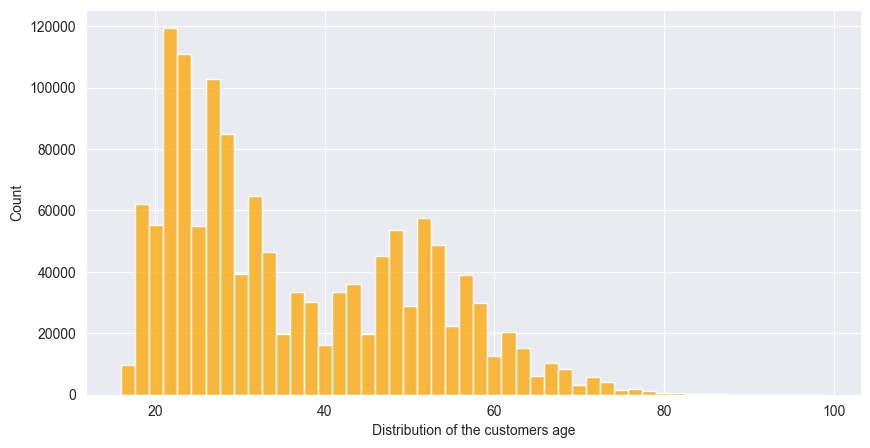

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=50, color='orange')
ax.set_xlabel('Distribution of the customers age')
plt.show()

**<span style="color:#023e8a;"> Status in H&M club. Almost every customer has an active club status, some of them begin to activate it (pre-create). A tiny part of customers abandoned the club.</span>**

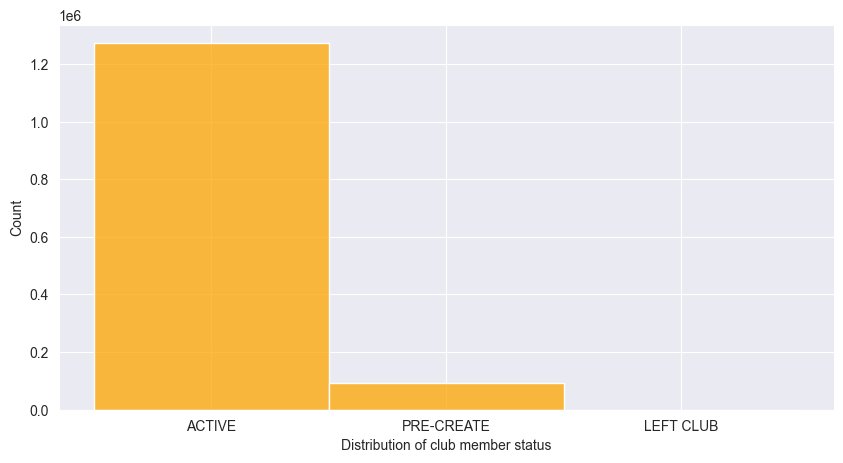

In [24]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status', color='orange')
ax.set_xlabel('Distribution of club member status')
plt.show()

**<span style="color:#023e8a;"> Here we have three types for NO DATA. Let's unite these values.</span>**

In [25]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly'], dtype=object)

In [26]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [27]:
pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()

**<span style="color:#023e8a;"> Customers prefer not to get any messages about the current news.</span>**

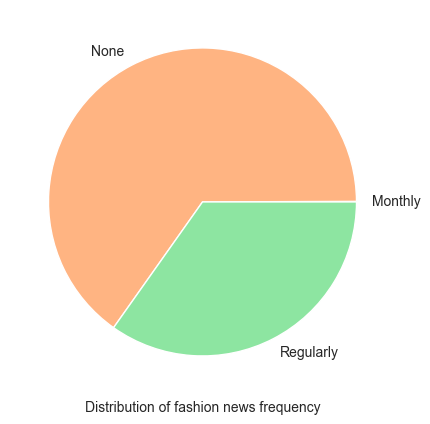

In [28]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
# ax = sns.histplot(data=customers, x='fashion_news_frequency', color='orange')
# ax = sns.pie(data=customers, x='fashion_news_frequency', color='orange')
colors = sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors = colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fashion news frequency')
plt.show()

## **<span id="Transactions" style="color:#023e8a;">Transactions</span>**

**<span style="color:#023e8a;"> Transactions data description: </span>**

> `t_dat` **<span style="color:#023e8a;">: A unique identifier of every customer</span>**  
> `customer_id` **<span style="color:#023e8a;">: A unique identifier of every customer </span>**  **<span style="color:#FF0000;">(in </span>** `customers` **<span style="color:#FF0000;"> table)</span>**  
> `article_id` **<span style="color:#023e8a;">: A unique identifier of every article</span>**  **<span style="color:#FF0000;">(in </span>** `articles` **<span style="color:#FF0000;"> table)</span>**  
> `price` **<span style="color:#023e8a;">: Price of purchase</span>**  
> `sales_channel_id` **<span style="color:#023e8a;">: 1 or 2</span>**  

In [29]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [30]:
pd.set_option('display.float_format', '{:.4f}'.format)
transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

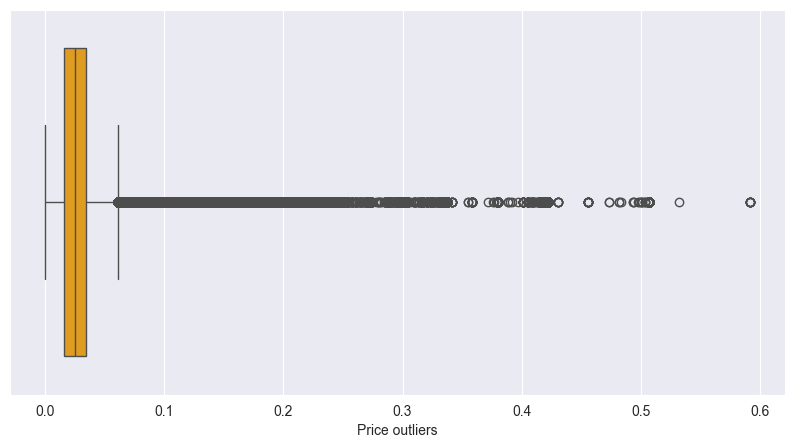

In [32]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transactions, x='price', color='orange')
ax.set_xlabel('Price outliers')
plt.show()

**<span style="color:#023e8a;"> Top 10 customers by num of transactions. </span>**

In [34]:
transactions_byid = transactions.groupby('customer_id').count()
transactions_byid.describe()

,t_dat,article_id,price,sales_channel_id
count,1362281.0000,1362281.0000,1362281.0000,1362281.0000
mean,23.3346,23.3346,23.3346,23.3346
std,39.2423,39.2423,39.2423,39.2423
min,1.0000,1.0000,1.0000,1.0000
25%,3.0000,3.0000,3.0000,3.0000
50%,9.0000,9.0000,9.0000,9.0000
75%,27.0000,27.0000,27.0000,27.0000
max,1895.0000,1895.0000,1895.0000,1895.0000


In [ ]:
transactions_byid.sort_values(by='price', ascending=False)['price'][:10]

**<span style="color:#023e8a;"> However, comparing prices inside groups is more accurate, because accessories and trousers prices may vary largerly. </span>**

In [35]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]

In [36]:
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

**<span style="color:#023e8a;"> Here we see outliers for group name prices. Lower/Upper/Full body have a huge price variance. I guess it could be like some unique collections, relative to casual ones. Some high price articles even belong to accessories group.</span>**

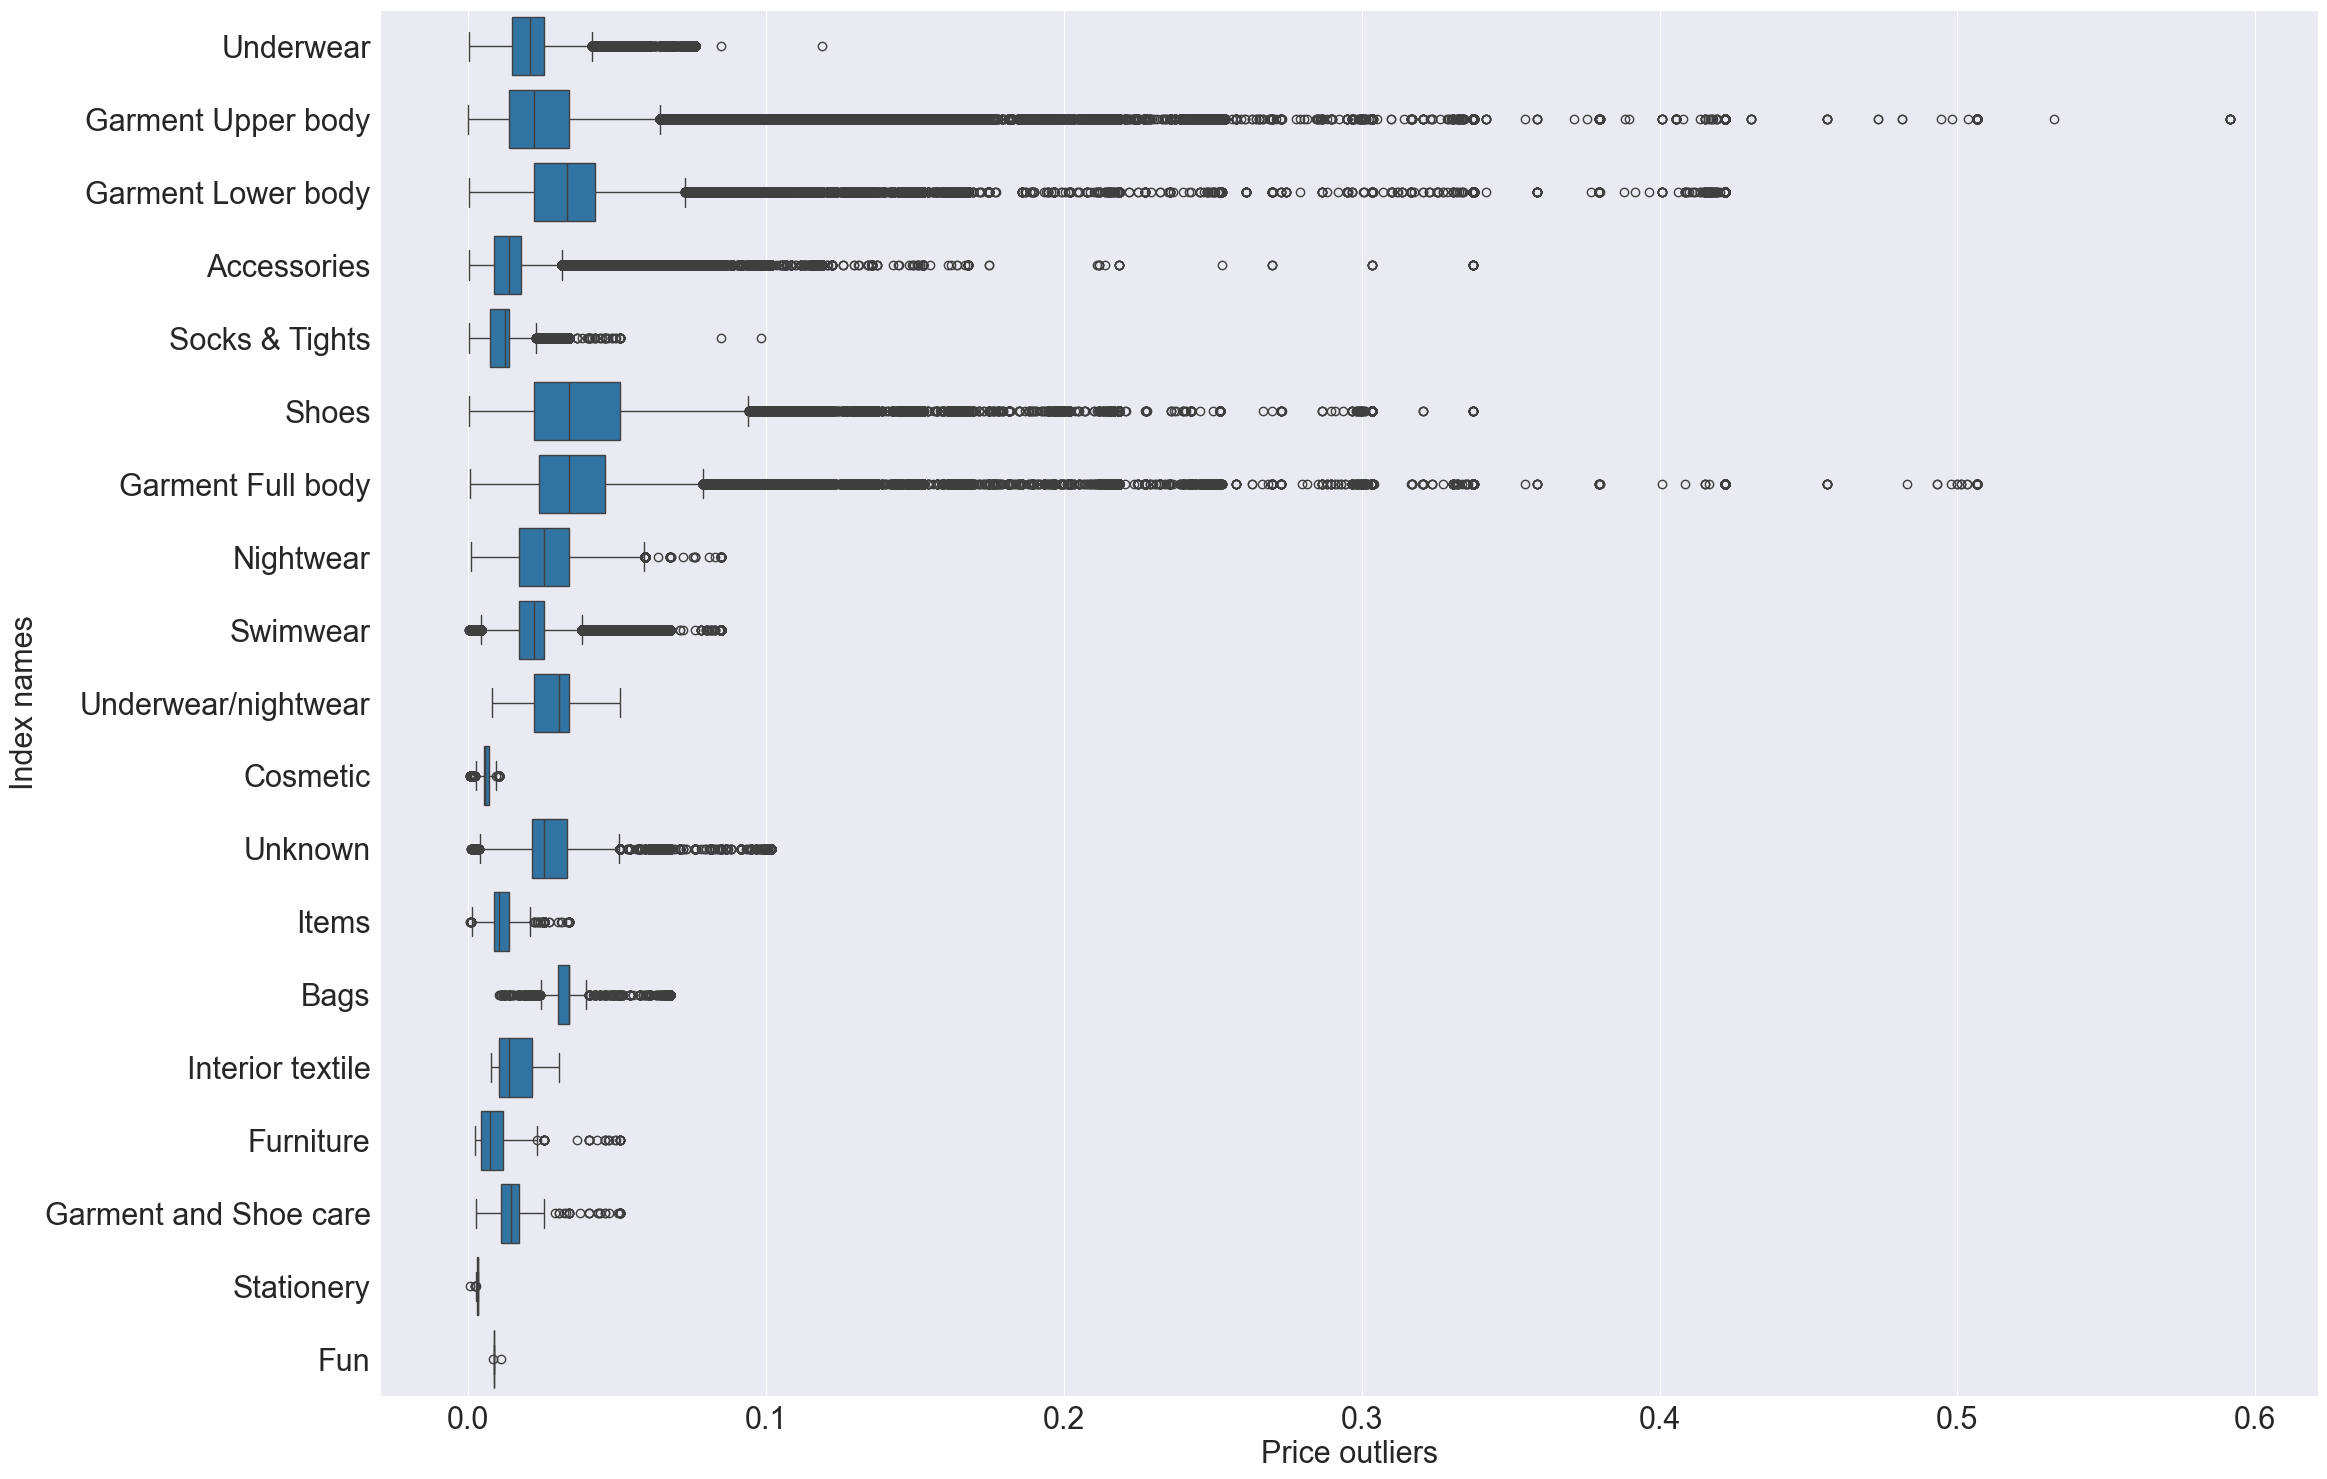

In [37]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

**<span style="color:#023e8a;"> Then look at boxplot prices according to accessories product group and find the reasons of high prices inside group.</span>**

**<span style="color:#023e8a;"> The largest outliers can be found among bags, which is logical enough. In addition, scarves and other accessories have articles with prices highly contrasting to the rest of garments.</span>**

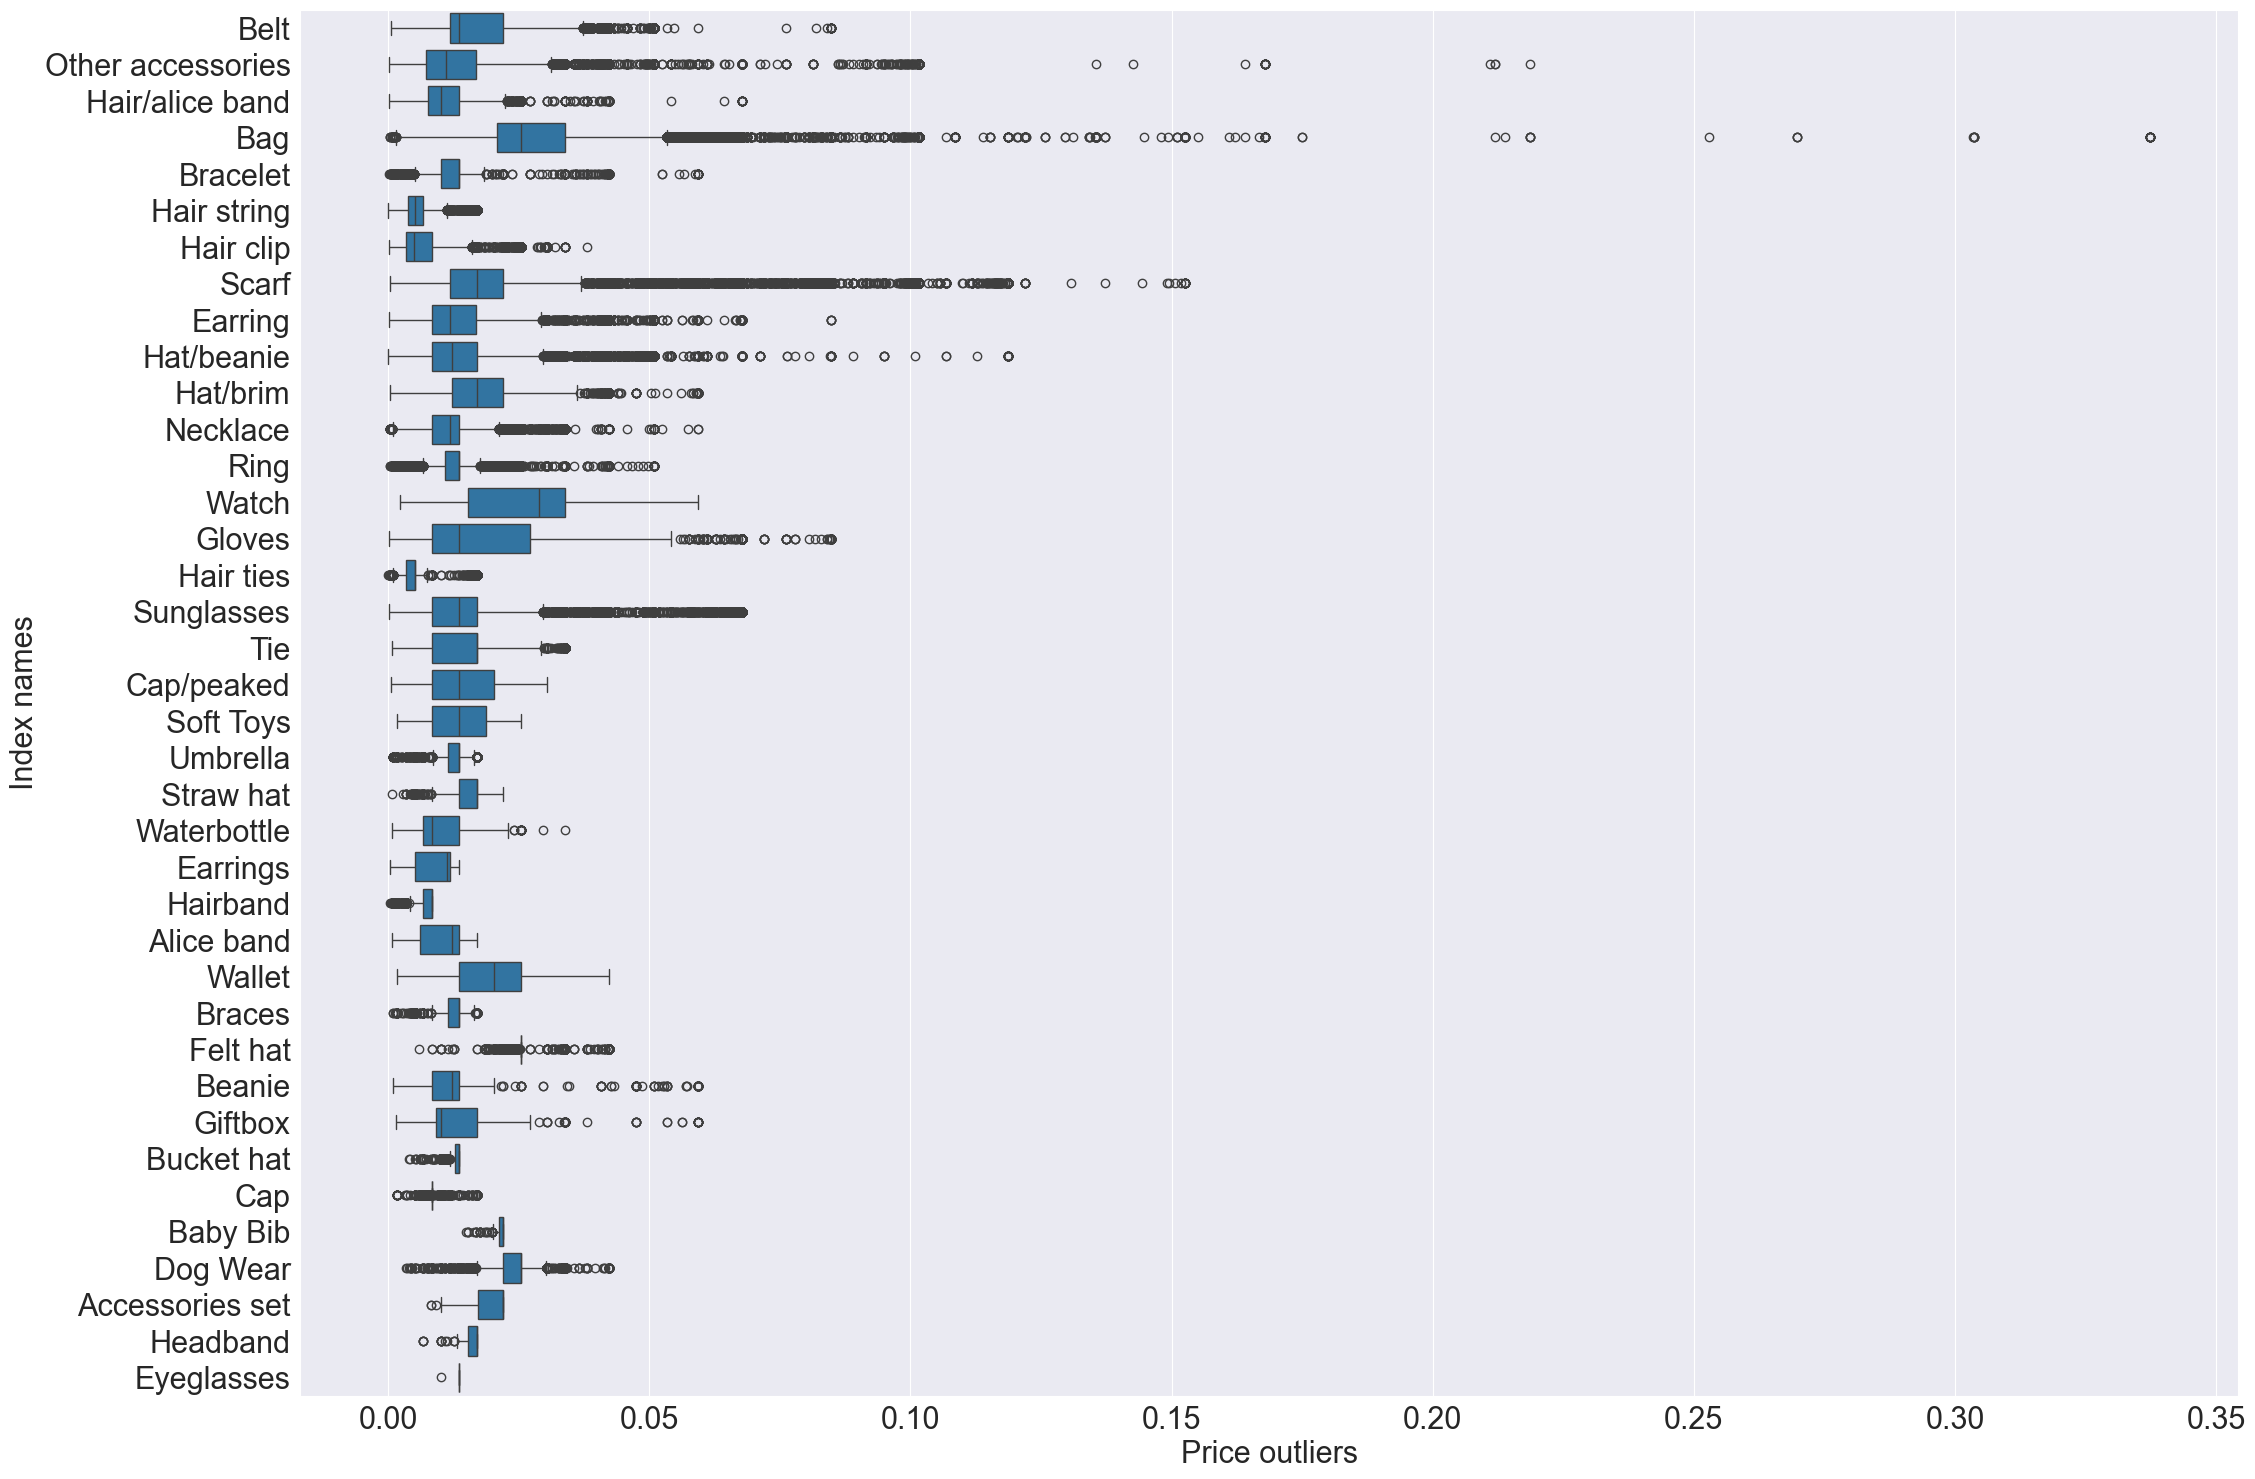

In [38]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
del _

plt.show()

**<span style="color:#023e8a;"> The index with the highest mean price is Ladieswear. With the lowest - children. </span>**

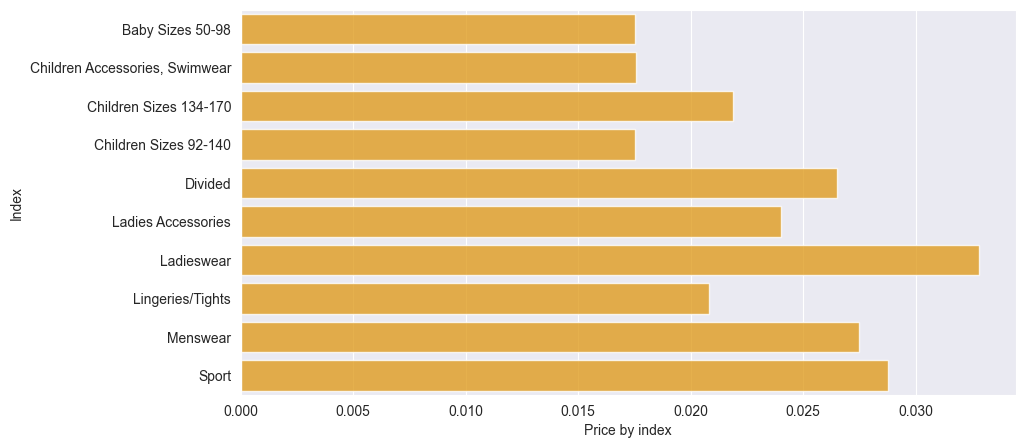

In [39]:
articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

**<span style="color:#023e8a;"> Stationery has the lowest mean price, the highest - shoes. </span>**

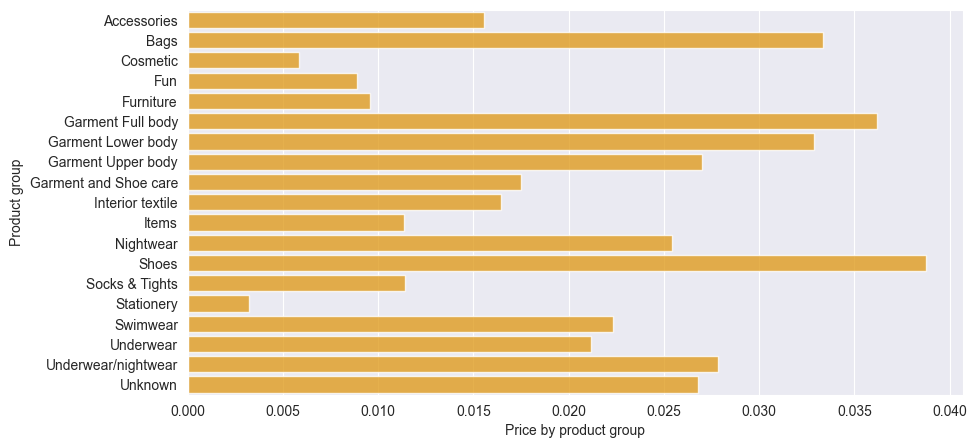

In [40]:
articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

**<span style="color:#023e8a;"> Now check the mean price change in time for top 5 product groups by mean price: </span>**
>`Shoes`  
>`Garment Full body`  
>`Bags`  
>`Garment Lower body`  
>`Underwear/nightwear`  

In [41]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])

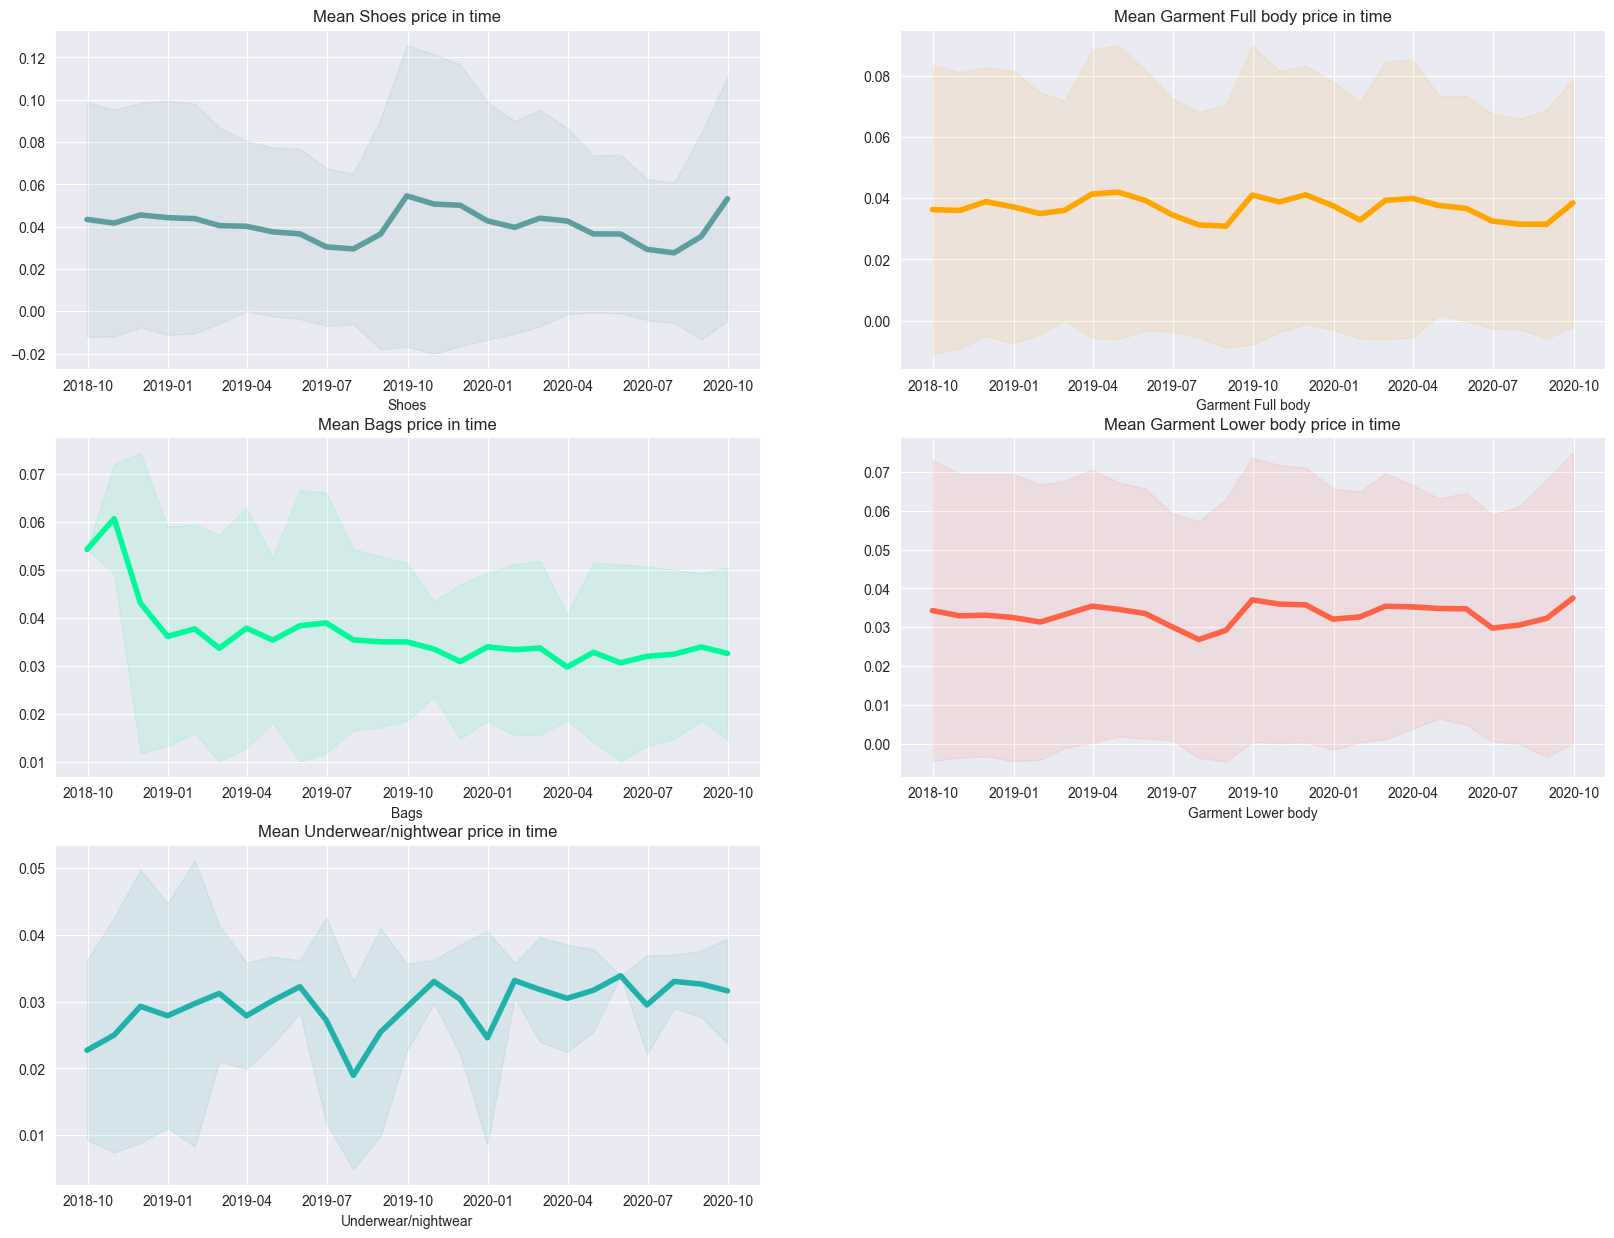

In [42]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()

## **<span id="Images" style="color:#023e8a;">Images with description and price</span>**

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [44]:
max_price_ids = transactions[transactions.t_dat==transactions.t_dat.max()].sort_values('price', ascending=False).iloc[:5][['article_id', 'price']]
min_price_ids = transactions[transactions.t_dat==transactions.t_dat.min()].sort_values('price', ascending=True).iloc[:5][['article_id', 'price']]

**<span style="color:#023e8a;"> Photos with description and price (top 5 max) </span>**

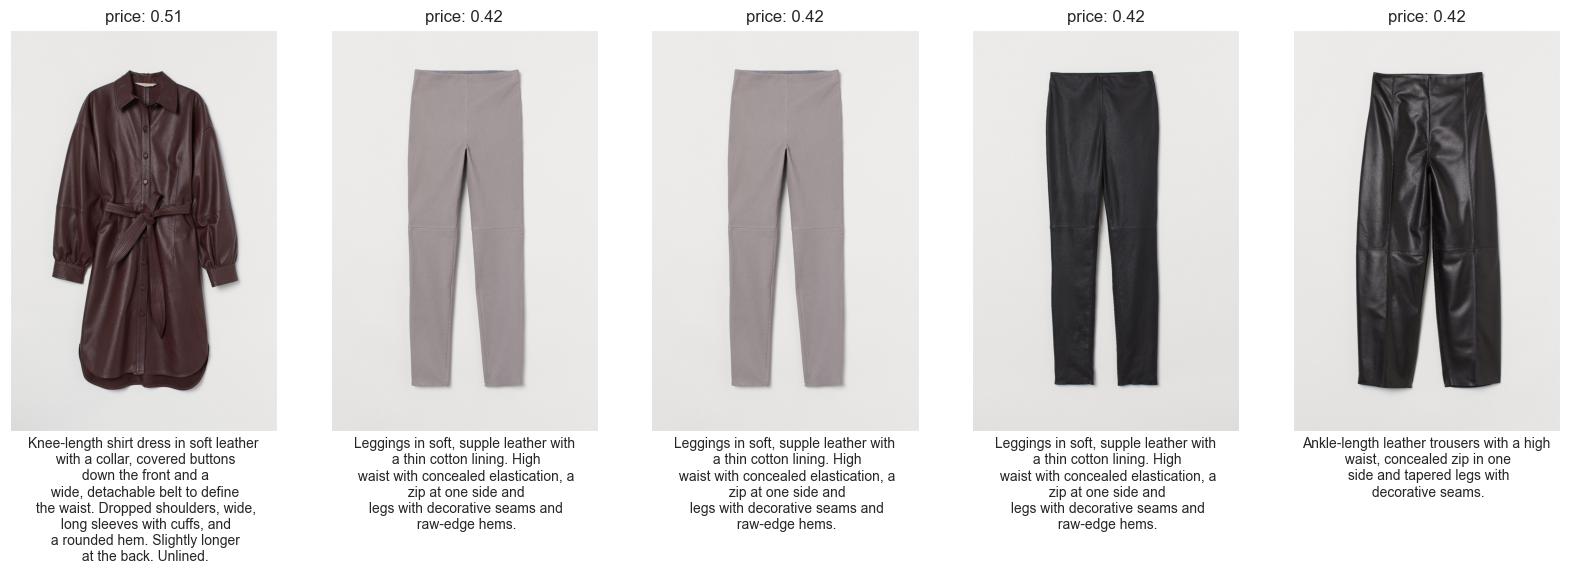

In [46]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in max_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 5 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'../data/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.2f}')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    ax[i].set_xlabel(desc, fontsize=10)
    i += 1
plt.show()

**<span style="color:#023e8a;"> Photos with description and price (top 5 min) </span>**

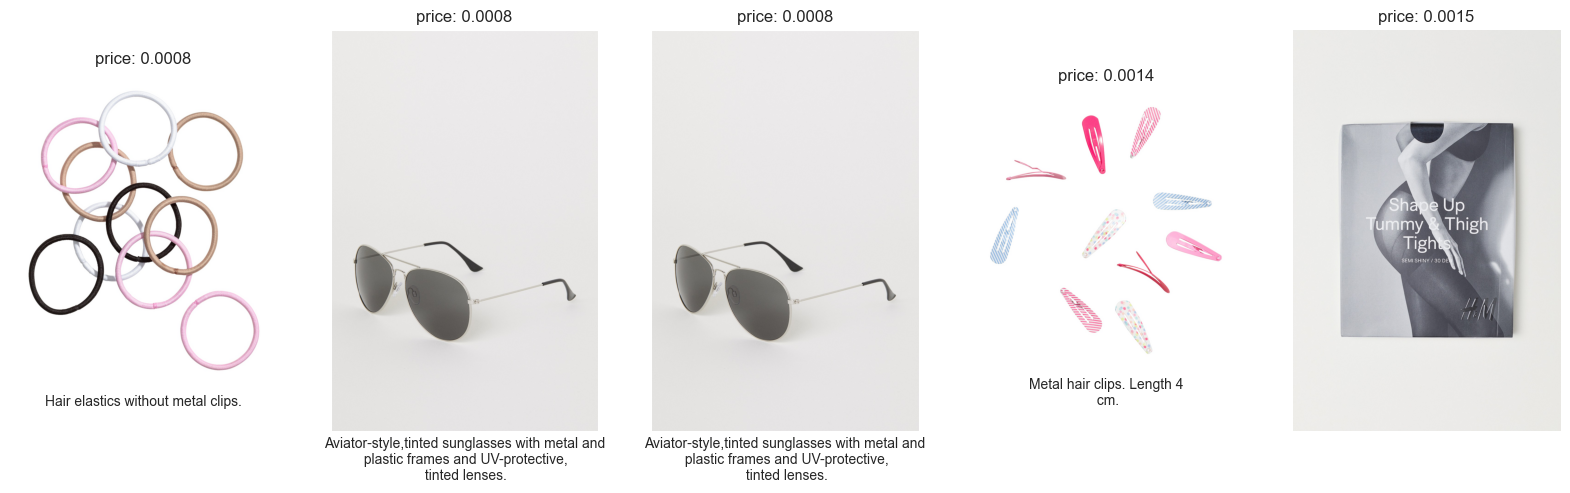

In [48]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in min_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'../data/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1
plt.axis('off')
plt.show()